 VILLAR GARCIA Jessica Mariana
 
 BEJINARIU George 
# Machine Learning Project
## Fall detection


The aim of this project is to study the ability of different classification models to detect fall thanks to some indicators.



In [ ]:
# Libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")

### The Data 

The dataset 'falldata' contains a sample of 2821 observations describing the walk of several people. The features correspond to 87 indicators computed on either the raw signals, the derivative of the signal or the energy of the signals. The response variable, fall or no fall, is described by a binary label. 

In [ ]:
# Choose File to be uploaded (falldataproject.csv)
from google.colab import files
uploaded = files.upload()

Saving falldataproject.csv to falldataproject.csv


In [ ]:
# Data set
data = pd.read_csv('falldataproject.csv')
y = data['FALL']
x = data.iloc[:,1:-1]

In [ ]:
# Data set view
# 87 indicators
data.head()

,obs,raw_feat_X1,raw_feat_X2,raw_feat_X3,raw_feat_X4,raw_feat_X5,raw_feat_X6,raw_feat_X7,raw_feat_X8,raw_feat_X9,raw_feat_X10,raw_feat_X11,raw_feat_X12,raw_feat_X13,raw_feat_X14,raw_feat_X15,raw_feat_X16,raw_feat_X17,raw_feat_X18,raw_feat_X19,raw_feat_X20,raw_feat_X21,raw_feat_X22,raw_feat_X23,raw_feat_X24,raw_feat_X25,raw_feat_X26,raw_feat_X27,raw_feat_X28,raw_feat_X29,fft_feat_X1,fft_feat_X2,fft_feat_X3,fft_feat_X4,fft_feat_X5,fft_feat_X6,fft_feat_X7,fft_feat_X8,fft_feat_X9,fft_feat_X10,...,fft_feat_X20,fft_feat_X21,fft_feat_X22,fft_feat_X23,fft_feat_X24,fft_feat_X25,fft_feat_X26,fft_feat_X27,fft_feat_X28,fft_feat_X29,deriv_feat_X1,deriv_feat_X2,deriv_feat_X3,deriv_feat_X4,deriv_feat_X5,deriv_feat_X6,deriv_feat_X7,deriv_feat_X8,deriv_feat_X9,deriv_feat_X10,deriv_feat_X11,deriv_feat_X12,deriv_feat_X13,deriv_feat_X14,deriv_feat_X15,deriv_feat_X16,deriv_feat_X17,deriv_feat_X18,deriv_feat_X19,deriv_feat_X20,deriv_feat_X21,deriv_feat_X22,deriv_feat_X23,deriv_feat_X24,deriv_feat_X25,deriv_feat_X26,deriv_feat_X27,deriv_feat_X28,deriv_feat_X29,FALL
0,0,0.249744,-0.162770,0.223727,0.393904,-0.154366,0.128968,1.090661,0.913849,0.505526,-0.105793,-0.195484,-0.583576,-0.185653,0.223045,0.003446,-0.103057,0.480750,0.781277,-0.119297,-0.994378,0.152711,0.114531,0.527218,0.684310,0.226488,0.214075,0.525904,-1.095983,1.919093,-0.449884,0.433748,0.463316,0.274141,-0.218774,-0.048435,-1.033262,-0.812810,-0.683375,-0.455641,...,0.517962,0.052870,0.000862,-0.152333,-0.152333,0.087599,0.083742,0.790298,1.111155,-0.184972,0.657302,-0.227088,-0.252275,-1.100050,-0.103071,0.237298,2.326422,2.364639,1.891086,0.052099,-0.103057,0.131791,-0.116826,0.419307,-1.299307,-0.093961,-0.709053,-1.045640,0.283405,-0.676243,0.121241,0.734862,0.179370,0.402461,0.638393,0.344236,0.823239,-0.409350,1.425206,1
1,1,0.385843,-0.660978,-0.127798,-0.205710,-0.160936,0.111606,0.171391,2.889781,0.377333,0.602582,-0.204411,-0.724876,-0.186407,0.510015,0.003446,-0.019068,-0.818148,-0.664431,0.376651,-0.626828,0.387287,1.476641,0.866832,0.959403,0.311288,0.449926,0.367252,-1.158551,1.778148,-0.646348,-0.355812,-0.491957,0.167070,-0.219944,-0.051636,-1.178882,-0.871564,-0.704800,-0.455712,...,0.815871,0.104235,-0.111211,-0.152333,-0.152333,-0.190016,-0.186805,0.791372,-0.610703,1.517499,0.563679,-0.710151,-0.252275,0.192193,-0.018958,0.483344,-2.196963,2.772897,-1.889601,0.071416,-0.019068,0.147795,-0.053961,0.648177,-0.214179,-0.005129,0.642421,0.419777,0.476751,0.549323,-0.182778,0.357499,-0.056181,0.840313,0.605672,0.655029,1.052671,-0.177353,1.613721,1
2,2,3.344528,-4.535931,0.165140,-0.228745,3.203818,3.379462,1.089901,2.097552,0.877990,0.200807,3.039838,0.706419,2.898928,3.938749,4.481602,3.694243,0.174268,-0.122291,5.761222,0.255291,-4.421517,4.881914,0.187604,0.330619,3.273877,3.834530,2.093866,-0.330219,3.147863,1.553830,-0.333388,-0.292473,3.390496,3.013265,3.155365,-1.071414,-0.834429,-0.692839,-0.455690,...,0.856455,0.149476,-0.106898,-0.152333,-0.152333,3.199629,3.220504,2.343403,-0.186892,2.891512,3.091500,-4.351699,-0.252275,-0.502388,3.694409,4.205189,-2.773949,2.276907,-2.030001,0.049545,3.694243,1.661714,3.342800,3.810750,4.777408,4.019151,0.529799,-0.779201,4.150327,-1.376566,0.425260,8.093449,-0.684318,0.046744,3.440332,3.965586,2.916183,0.367674,3.952479,1
3,3,3.190676,-2.884463,-1.153080,-0.698292,1.868221,2.493077,2.546198,3.817391,3.711000,2.382995,1.777882,1.274712,1.653909,3.174737,2.624805,2.059189,-0.701393,-0.664431,5.406974,0.108272,-2.193047,2.430117,-0.718033,-0.140969,3.179922,3.157377,1.748342,1.111691,1.082920,0.997529,-0.380522,-0.392840,2.490419,1.764962,2.313468,-1.063596,-0.834205,-0.693290,-0.455694,...,0.329103,0.064652,0.021450,-0.152333,-0.152333,2.114421,2.130555,2.085249,-0.324901,2.729675,3.512803,-3.106884,1.376255,-0.470082,2.059326,3.056140,-1.043750,3.002674,-1.003764,0.050335,2.059189,1.714366,1.816143,3.300994,0.436898,1.755185,1.092913,-1.178860,1.056790,-3.652617,-4.743065,-0.774592,-1.076903,-0.818687,3.572430,3.409429,2

#### Looking at the Data - The Imbalance

We notice that there is a very big imbalance in our data. Only about 200 instances result in a fall. That means that if we design an algorithm which will always result in a "no fall" it will have a 92.83 % accuracy, which seems pretty good, but we know that this algorithm would be useless. Thus we have to find ways to deal with the data imbalance

In [ ]:
print('Percentage of data labeled in a NO FALL: ', (1 - y.sum()/y.size)*100, '%')

Percentage of data labeled in a NO FALL:  92.83941864587027 %


#### Taking the Data imbalance into account

The first thing that we can do is to look at model assessment measures other than accuracy. Alternatives are:

*The confusion matrix - the matrix of true positives (TP), true negatives (TN), false positives (FP) and false negatives (FN).

*Precision/Specificity: how many selected instances are relevant = TP/(TP+FP)

*Recall/Sensitivity: how many relevant instances are selected = TP/(TP+FN)

*F1 score: harmonic mean of precision and recall = the harmonic mean of precission and recall.

*ROC curves and AUC

Thus we will firstly construct some models using the original data and compare them using the previously mentioned metrics, which are more adapted than accuracy in this case.


#### Which metrics is most relevant for our Project?

In our case we are trying to predict falls. Knowing that a fall can have very bad consequences we really want to avoid misclassifying a fall as a 'no fall' and aren't as worried if we missclassify a 'no fall' as a fall. Thus, the most important metric is the true positive rate, or the recall. Thus, ROC curves and the AUCs might be of particular importance as they depend on the True Positive Rate and the False Positive Rate.

### Training some models
We will firstly train some models using the original data so we can compare them once we deal with the imbalance problem. 

#### Train and Test data sets

Test set 25%, Train set 75%

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/4, random_state=0)

In [ ]:
#Function to print the metrics
def print_metrics(y, y_test):

    tn, fp, fn, tp = confusion_matrix(y_test, y).ravel()
    #specificity = tn / (tn + fp)
    #fpr, tpr, thresholds = metrics.roc_curve(y_test, y, pos_label=2)
    print("Accuracy=",float("{:.4f}".format(metrics.accuracy_score(y_test, y))),
          "\nBalanced Accuracy =",float("{:.4f}".format(balanced_accuracy_score(y_test,y))),
          "\nTP = ", tp, "FP = ", fp, "TN  = ", tn, "FN = ", fn,
      "\nPrecision=",float("{:.4f}".format(metrics.precision_score(y_test, y))),
      "\nRecall=",float("{:.4f}".format(metrics.recall_score(y_test, y))), 
      #"True Negaive Rate=",float("{:.4f}".format(specificity)),
      "\nF1 Score=",float("{:.4f}".format(metrics.f1_score(y_test, y))),
      "\nAUC=",float("{:.4f}".format(roc_auc_score(y_test, y))))
      

In [ ]:
# Function to plot a boxplot for model comparison via cross validation for a given metric
def box_cross_validation(metric_name, models_, classifiers_):
    kfold = [StratifiedKFold(n_splits=10, shuffle=True, random_state=0) for i in range(len(models_))] # Stratified K Fold splits to preserve the original classes distribution
    cv_scores = [cross_val_score(classifiers_[i], x, y, cv=kfold[i], scoring=metric_name) for i in range(len(models_))]

    fig = plt.figure(figsize=(6, 3.5))
    fig.suptitle('Model Comparison')
    ax = fig.add_subplot()
    plt.boxplot(cv_scores)
    ax.set(ylabel=metric_name)
    ax.set_xticklabels(models_)

#### Naive Bayes Model:

In [ ]:
gnb = GaussianNB()
gnbfit = gnb.fit(x_train, y_train)
y_bayes = gnbfit.predict(x_test)

# Metrics 
print_metrics(y_bayes, y_test)

Accuracy= 0.9547 
Balanced Accuracy = 0.9362 
TP =  43 FP =  28 TN  =  631 FN =  4 
Precision= 0.6056 
Recall= 0.9149 
F1 Score= 0.7288 
AUC= 0.9362


### Looking at the metrics

We observe that the precision is far away from 1, which means the model does missclassifies a lot of negative samples, resulting in many false positives.

#### Linear Discriminant Analysis

In [ ]:
lda = LinearDiscriminantAnalysis();
ldafit=lda.fit(x_train,y_train)
y_lda = ldafit.predict(x_test)

# Metrics 
print_metrics(y_lda,y_test)

Accuracy= 0.9873 
Balanced Accuracy = 0.9141 
TP =  39 FP =  1 TN  =  658 FN =  8 
Precision= 0.975 
Recall= 0.8298 
F1 Score= 0.8966 
AUC= 0.9141


## Comment on the metrics

LDA does a better job in avoiding false positives, but it results in more false negatives, which gives it a worse recall.

#### Logistic Regression

In [ ]:
logr = LogisticRegression(solver="lbfgs")
logrfit= logr.fit(x_train,y_train)
y_logr = logrfit.predict(x_test)

# Metrics 
print_metrics(y_logr,y_test)

Accuracy= 0.9887 
Balanced Accuracy = 0.9347 
TP =  41 FP =  2 TN  =  657 FN =  6 
Precision= 0.9535 
Recall= 0.8723 
F1 Score= 0.9111 
AUC= 0.9347


## Comment on the metrics results

This is the highest F1 score so far

#### KNN

In [ ]:
# To choose a k we'll use a validation set 
x_train1, x_vald, y_train1, y_vald = train_test_split(x_train, y_train, test_size=0.20, random_state=0)
knn = [KNeighborsClassifier(n_neighbors = i+1) for i in range(10)]
knnfit = [knn[i].fit(x_train1,y_train1) for i in range(10)]
y_knn = [knnfit[i].predict(x_vald) for i in range(10)]
k = [metrics.f1_score(y_vald, y_knn[i]) for i in range(10)]
np.where(k == np.amax(k))

(array([1, 3, 5, 6, 7, 8, 9]),)

In [ ]:
# We know train the classifier with the original training set
knn = KNeighborsClassifier(n_neighbors = 4)
knnfit = knn.fit(x_train,y_train)
y_knn = knnfit.predict(x_test)

# Metrics 
print_metrics(y_knn,y_test)

Accuracy= 0.9873 
Balanced Accuracy = 0.9043 
TP =  38 FP =  0 TN  =  659 FN =  9 
Precision= 1.0 
Recall= 0.8085 
F1 Score= 0.8941 
AUC= 0.9043


We obtain a 100% precision, that is, the model does not classify false positive samples. However, it still predicts false negatives.

#### Decision Tree

In [ ]:
tree = DecisionTreeClassifier(random_state=0)
treefit = tree.fit(x_train, y_train)
pred_tree = treefit.predict_proba(x_test)
y_tree = np.argmax(pred_tree, axis=1)

# Metrics 
print_metrics(y_tree,y_test)

Accuracy= 0.9844 
Balanced Accuracy = 0.9126 
TP =  39 FP =  3 TN  =  656 FN =  8 
Precision= 0.9286 
Recall= 0.8298 
F1 Score= 0.8764 
AUC= 0.9126


#### Bagging

In [ ]:
treebag = DecisionTreeClassifier(random_state=0)
bagmod = BaggingClassifier(base_estimator=treebag)
bagfit = bagmod.fit(x_train, y_train)

pred_bag = bagfit.predict_proba(x_test)
y_bag = np.argmax(pred_bag,axis = 1)

# Metrics 
print_metrics(y_bag, y_test)

Accuracy= 0.9858 
Balanced Accuracy = 0.9233 
TP =  40 FP =  3 TN  =  656 FN =  7 
Precision= 0.9302 
Recall= 0.8511 
F1 Score= 0.8889 
AUC= 0.9233


#### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf_fit = rf.fit(x_train, y_train)
pred_rf = rf_fit.predict_proba(x_test)

y_rf=np.argmax(pred_rf,axis=1)

# Metrics 
print_metrics(y_rf,y_test)

Accuracy= 0.9873 
Balanced Accuracy = 0.9141 
TP =  39 FP =  1 TN  =  658 FN =  8 
Precision= 0.975 
Recall= 0.8298 
F1 Score= 0.8966 
AUC= 0.9141


### Model Performance Summary 

In [ ]:
models = ['Naive Bayes', 'LDA', 'Logistic Regression', 'KNN', 'Decision Tree', 'Bagging', 'Random Forest']
rows_names = ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1 Score','AUC']
y_vector = [y_bayes, y_lda, y_logr, y_knn, y_tree, y_bag, y_rf]
accuracy_vector = [round(metrics.accuracy_score(y_test, y),4) for y in y_vector]
b_accuracy_vector = [round(balanced_accuracy_score(y_test,y),4) for y in y_vector]
precision_vector = [round(metrics.precision_score(y_test, y),4) for y in y_vector]
recall_vector = [round(metrics.recall_score(y_test, y),4) for y in y_vector]
f1_vector = [round(metrics.f1_score(y_test, y),4) for y in y_vector]
auc_vector = [round(roc_auc_score(y_test, y),4) for y in y_vector]
summary_df = pd.DataFrame([accuracy_vector,b_accuracy_vector,precision_vector,recall_vector,f1_vector, auc_vector])
summary_df.columns = models
summary_df.index = rows_names
summary_df

,Naive Bayes,LDA,Logistic Regression,KNN,Decision Tree,Bagging,Random Forest
Accuracy,0.9547,0.9873,0.9887,0.9873,0.9844,0.9858,0.9873
Balanced Accuracy,0.9362,0.9141,0.9347,0.9043,0.9126,0.9233,0.9141
Precision,0.6056,0.9750,0.9535,1.0000,0.9286,0.9302,0.9750
Recall,0.9149,0.8298,0.8723,0.8085,0.8298,0.8511,0.8298
F1 Score,0.7288,0.8966,0.9111,0.8941,0.8764,0.8889,0.8966
AUC,0.9362,0.9141,0.9347,0.9043,0.9126,0.9233,0.9141


#### The previous table gives us a rough feeling for how these methods perform, because it takes into consideration only a single train-test split of our data. To get a better idea of their actual performences we will use cross validation.

## Corss-Validation

In [ ]:
models2 = ['GNB', 'LR', 'LDA', 'KNN','D. Tree','Bagging', 'R. Forest']
classifiers = [GaussianNB(),LogisticRegression(),LinearDiscriminantAnalysis(),
              KNeighborsClassifier(n_neighbors = 4),DecisionTreeClassifier(),
              BaggingClassifier(base_estimator=DecisionTreeClassifier()),RandomForestClassifier()]

### Recall Comparison

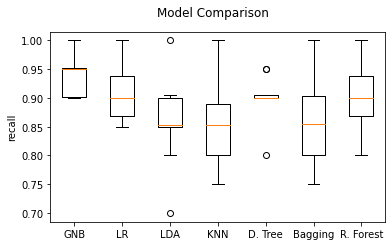

In [ ]:
box_cross_validation('recall', models2, classifiers)

### Comment

Surprisingly, the Naive Bayes classifier displays the best recall.

## F1 comparison

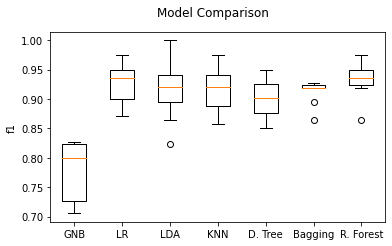

In [ ]:
warnings.filterwarnings("ignore")
box_cross_validation('f1', models2, classifiers)

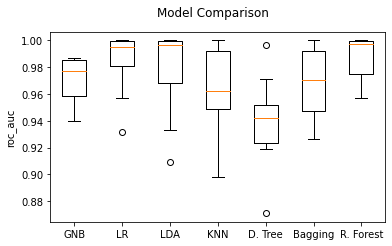

In [ ]:
warnings.filterwarnings("ignore")
box_cross_validation('roc_auc', models2, classifiers)

## Comment about under-sampling

Under-sampling represents a way in which we could create a balanced dataset out of our imbalanced one. However, as the rare class has only 200 samples and knowing that we have around 90 features this approach would result in underfitting. We could reduce the features, but we have no further information about the features to decide which ones are more relevant. Thus, we choose to not use a under-sampling approach.

# Dealing with the Data Imbalance using ensemble methods

In the next section we are going to balance our data set and use bagging to aggregate different learners in order to obtain an enseble model.
The BalancedBaggingClassifier offers this option by first creating balanced datasets and then using them in the bagging process.

### Balenced Bagging - NBayes

In [ ]:
bagged_Nbays = BalancedBaggingClassifier(base_estimator =GaussianNB() )

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores1_NBayes = cross_val_score(bagged_Nbays, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores2_NBayes = cross_val_score(bagged_Nbays, x, y, scoring='f1', cv=cv, n_jobs=-1)
scores3_NBayes = cross_val_score(bagged_Nbays, x, y, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
scores4_NBayes = cross_val_score(bagged_Nbays, x, y, scoring='recall', cv=cv, n_jobs=-1)

print('Mean ROC AUC for bagged NBayes: %.3f' % np.mean(scores1_NBayes), '\n')
print('Mean F1 for bagged NBayes: %.3f' % np.mean(scores2_NBayes), '\n')
print('Mean balanced accuracy for bagged Nbayes: %.3f' % np.mean(scores3_NBayes), '\n')
print('Mean Recall for bagged Nbayes: %.3f' % np.mean(scores4_NBayes), '\n')



Mean ROC AUC for bagged NBayes: 0.974 

Mean F1 for bagged NBayes: 0.757 

Mean balanced accuracy for bagged Nbayes: 0.950 

Mean Recall for bagged Nbayes: 0.949 



## Balanced Bagging - Linear Discriminant Analysis

In [ ]:

bagged_LDA = BalancedBaggingClassifier(base_estimator =LinearDiscriminantAnalysis() )

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores1_LDA = cross_val_score(bagged_LDA, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores2_LDA = cross_val_score(bagged_LDA, x, y, scoring='f1', cv=cv, n_jobs=-1)
scores3_LDA = cross_val_score(bagged_LDA, x, y, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
scores4_LDA = cross_val_score(bagged_LDA, x, y, scoring='balanced_accuracy', cv=cv, n_jobs=-1)

print('Mean ROC AUC for bagged LDA: %.3f' % np.mean(scores1_LDA), '\n')
print('Mean F1 for bagged LDA: %.3f' % np.mean(scores2_LDA), '\n')
print('Mean balanced accuracy for bagged LDA: %.3f' % np.mean(scores3_LDA), '\n')
print('Mean Recall for bagged LDA: %.3f' % np.mean(scores4_LDA), '\n')



Mean ROC AUC for bagged LDA: 0.975 

Mean F1 for bagged LDA: 0.871 

Mean balanced accuracy for bagged LDA: 0.965 

Mean Recall for bagged LDA: 0.962 



## Balance Bagging -  Logistic Regression

In [ ]:

bagged_LR = BalancedBaggingClassifier(base_estimator =LogisticRegression() )

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores1_LR = cross_val_score(bagged_LR, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores2_LR = cross_val_score(bagged_LR, x, y, scoring='f1', cv=cv, n_jobs=-1)
scores3_LR = cross_val_score(bagged_LR, x, y, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
scores4_LR = cross_val_score(bagged_LR, x, y, scoring='recall', cv=cv, n_jobs=-1)



print('Mean ROC AUC for bagged LR: %.3f' % np.mean(scores1_LR), '\n')
print('Mean F1 for bagged LR: %.3f' % np.mean(scores2_LR), '\n')
print('Mean balanced accuracy for bagged LR: %.3f' % np.mean(scores3_LR), '\n')
print('Mean Recall for bagged LR: %.3f' % np.mean(scores4_LR), '\n')




Mean ROC AUC for bagged LR: 0.986 

Mean F1 for bagged LR: 0.879 

Mean balanced accuracy for bagged LR: 0.964 

Mean Recall for bagged LR: 0.947 



## Balenced Bagging - KNN

In [ ]:

bagged_KNN = BalancedBaggingClassifier(base_estimator =KNeighborsClassifier() )

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores1_KNN = cross_val_score(bagged_KNN, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores2_KNN = cross_val_score(bagged_KNN, x, y, scoring='f1', cv=cv, n_jobs=-1)
scores3_KNN = cross_val_score(bagged_KNN, x, y, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
scores4_KNN = cross_val_score(bagged_KNN, x, y, scoring='recall', cv=cv, n_jobs=-1)



print('Mean ROC AUC for bagged KNN: %.3f' % np.mean(scores1_KNN), '\n')
print('Mean F1 for bagged KNN: %.3f' % np.mean(scores2_KNN), '\n')
print('Mean balanced accuracy for bagged KNN: %.3f' % np.mean(scores3_KNN), '\n')
print('Mean Recall for bagged KNN: %.3f' % np.mean(scores4_KNN), '\n')



Mean ROC AUC for bagged KNN: 0.988 

Mean F1 for bagged KNN: 0.843 

Mean balanced accuracy for bagged KNN: 0.960 

Mean Recall for bagged KNN: 0.946 



## Balanced Bagging - Decission trees

In [ ]:
bagged_DT = BalancedBaggingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores1_DT = cross_val_score(bagged_DT, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores2_DT = cross_val_score(bagged_DT, x, y, scoring='f1', cv=cv, n_jobs=-1)
scores3_DT = cross_val_score(bagged_DT, x, y, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
scores4_DT = cross_val_score(bagged_DT, x, y, scoring='recall', cv=cv, n_jobs=-1)



print('Mean ROC AUC for bagged DT: %.3f' % np.mean(scores1_DT), '\n')
print('Mean F1 for bagged DT: %.3f' % np.mean(scores2_DT), '\n')
print('Mean balanced accuracy for bagged DT: %.3f' % np.mean(scores3_DT), '\n')
print('Mean Recall for bagged DT: %.3f' % np.mean(scores4_DT), '\n')


Mean ROC AUC for bagged DT: 0.980 

Mean F1 for bagged DT: 0.874 

Mean balanced accuracy for bagged DT: 0.958 

Mean Recall for bagged DT: 0.932 



## Balanced Random Forest

Random Forest is inherently an ensemble method and we already observed that it perfomed fairly well in the previous section. Similar to the BalancedBaggingClassifier we can devide the dataset in balanced subsamples using the 'class_weight' function of the sklearn.RandomForestClassifier.


In [ ]:
RF_balanced = RandomForestClassifier(n_estimators=15, class_weight='balanced_subsample')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores1_DT = cross_val_score(RF_balanced, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scores2_DT = cross_val_score(RF_balanced, x, y, scoring='f1', cv=cv, n_jobs=-1)
scores3_DT = cross_val_score(RF_balanced, x, y, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
scores4_DT = cross_val_score(RF_balanced, x, y, scoring='recall', cv=cv, n_jobs=-1)


  
print('Mean ROC AUC for ballanced RF: %.3f' % np.mean(scores1_DT), '\n')
print('Mean F1 for ballanced RF: %.3f' % np.mean(scores2_DT), '\n')
print('Mean balanced accuracy for ballanced RF: %.3f' % np.mean(scores3_DT), '\n')
print('Mean Recall for ballanced RF: %.3f' % np.mean(scores4_DT), '\n')

Mean ROC AUC for ballanced RF: 0.980 

Mean F1 for ballanced RF: 0.925 

Mean balanced accuracy for ballanced RF: 0.941 

Mean Recall for ballanced RF: 0.884 



## Let's use boxplots to look at the previous statistics.

In [ ]:
classifiers2 = [BalancedBaggingClassifier(base_estimator =GaussianNB()),
                BalancedBaggingClassifier(base_estimator =LogisticRegression()), 
                BalancedBaggingClassifier(base_estimator =LinearDiscriminantAnalysis()),
                BalancedBaggingClassifier(base_estimator =KNeighborsClassifier()),
                BalancedBaggingClassifier(),
                RandomForestClassifier(n_estimators=15, class_weight='balanced_subsample')]
models3 = ['B_GNB', 'B_LR', 'B_LDA', 'B_KNN', 'B_DT', 'B_RF']

In [ ]:

box_cross_validation('recall', models3, classifiers2)


We now plotted some boxgraphs using cross validation for a reapeated stratified 10-fold. The results for recall look similar for all the used ensemble methods.
We observe that bagging our models results in a higher True Positive Rate, 


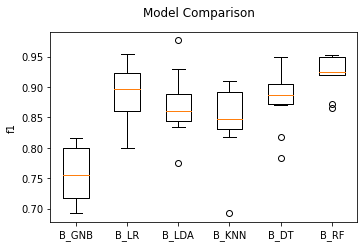

In [ ]:
box_cross_validation('f1', models3, classifiers2)


Watching the F1 score, we see a considerable difference between the bagged Naive Bayes classifer and the rest of the used methods. Another interesting aspect is that the balanced Random Forest has the best F1 score wheras it had the poorest Recall score, but not considerably worse.


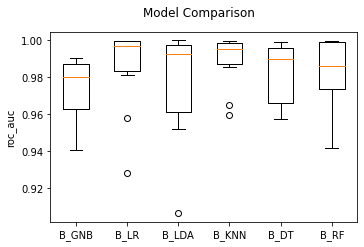

In [ ]:
box_cross_validation('roc_auc', models3, classifiers2)


Watching our results we consider that the used ensemble methods are worthy of further investigation for our given problem. However, we would probably drop the Bagged Naive Bayes classifier due to its poor precision score. Judging by our Recall score we would prefer the bagged Logistic Regression and we would pick the Balanced Random Forest if we wanted a better F1 score.
